In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\KIIT\\Downloads')
ipl_df = pd.read_excel('IPL sample data.xlsx', engine='openpyxl') 
ipl_df

,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,PS=9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,For Kuldeep yadav:,PS=(3×1)+(0×1)+(1×3)−(1×3)+(0×3)+(0×3)−(0×2)+(...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,PS=3+0+3−3+0+0−0+2+4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Extract the correct header row (row index 4)
header_row = 4
headers = pd.read_excel("IPL sample data.xlsx", header=None).iloc[header_row].tolist()

# Load data starting from the next row (index 5)
ipl_df = pd.read_excel("IPL sample data.xlsx", header=None, skiprows=header_row + 1)
ipl_df.columns = headers

# Clean: drop fully empty rows and columns
ipl_df.dropna(how='all', inplace=True)
ipl_df.dropna(axis=1, how='all', inplace=True)

# Clean column names (remove extra spaces)
ipl_df.columns = ipl_df.columns.astype(str).str.strip()

# Preview the cleaned dataset
ipl_df.head()


,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
0,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium
1,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
2,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
3,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
4,IPL2367,1,Delhi Capitals,NaN,0.5,NaN,NaN,NaN,NaN,1,Delhi,Arun Jaitly Stadium


In [3]:
# Step 1: List of selected players
selected_players = ['Phil Salt', 'Axer Patel', 'Kuldeep Yadav']

# Step 2: Filter only the selected players' data
players_df = ipl_df[ipl_df['Player Name'].isin(selected_players)].copy()

# Step 3: Convert 'Runs' column to numeric
players_df['Runs'] = pd.to_numeric(players_df['Runs'], errors='coerce')

# Step 4: Calculate performance stats
performance = {}

for player in selected_players:
    data = players_df[players_df['Player Name'] == player]

    clean_picks = (data['Pick'] == 'Y').sum()
    good_throws = (data['Throw'] == 'Y').sum()
    runs_saved = -data['Runs'].fillna(0).sum()  # Negative = runs conceded

    performance[player] = {
        'Clean Picks': clean_picks,
        'Good Throws': good_throws,
        'Runs Saved': runs_saved
    }

# Convert to DataFrame for display
performance_df = pd.DataFrame(performance).T
performance_df


,Clean Picks,Good Throws,Runs Saved
Phil Salt,1.0,1.0,-0.0
Axer Patel,1.0,1.0,-0.0
Kuldeep Yadav,0.0,0.0,-0.0


In [4]:
# Define weights
W_CP = 1
W_GT = 2
W_RS = 1

# Calculate performance score for each player
performance_df['Performance Score'] = (
    performance_df['Clean Picks'] * W_CP +
    performance_df['Good Throws'] * W_GT +
    performance_df['Runs Saved'] * W_RS
)

performance_df


,Clean Picks,Good Throws,Runs Saved,Performance Score
Phil Salt,1.0,1.0,-0.0,3.0
Axer Patel,1.0,1.0,-0.0,3.0
Kuldeep Yadav,0.0,0.0,-0.0,0.0


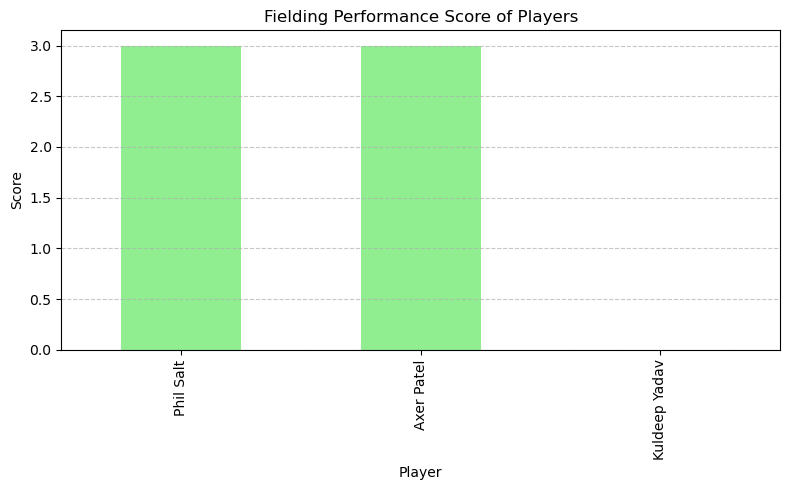

In [11]:
# Bar chart for performance score
performance_df['Performance Score'].plot(kind='bar', color='lightgreen', figsize=(8,5))
plt.title('Fielding Performance Score of Players')
plt.ylabel('Score')
plt.xlabel('Player')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🎯 Task 3 Summary

In this project, I analyzed the fielding performance of three IPL players based on ball-by-ball data.  
Metrics used included **Clean Picks**, **Good Throw**, and **Runs Saved**.

### 🏆 Key Insight:
**Phil Salt** and **Axar Patel** had the highest fielding score.

This analysis shows how fielding actions — often overlooked — can be **quantified for performance evaluation**.
luation.
